In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

from matplotlib import pyplot
import matplotlib as mpl

import gzip


%matplotlib inline


In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import mglearn


In [3]:
# This is a Fashin_MNIST Datasets 

data_file_name = {
    'train_image':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_image':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}

label_description = [ 'T-shirt/top','Trouser', 'Pullover',
    'Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

dir_data_file = './data'
image_size = 784

In [4]:
def LoadLabel(file_name):
    # file_name의 Binary 파일을 읽어서 numpy.ndarray 를 Return 한다.
    file_path = dir_data_file + "/" + file_name
    with gzip.open(file_path, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    rtval = data
    print(file_name + " file loaded")
    return rtval

def LoadImage(file_name):
    # file_name의 Binary 파일을 읽어서 numpy.ndarray 를 Return 한다.
    file_path = dir_data_file + "/" + file_name   
    with gzip.open(file_path, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    rtval = data.reshape(-1, image_size)
    print(file_name + " file loaded")
    return rtval

def DictoNumpy():
    ## Dictionary data-type으로 
    dic_data = {}
    print(type(dic_data))
    dic_data['train_image'] =  LoadImage(data_file_name['train_image'])
    dic_data['train_label'] = LoadLabel(data_file_name['train_label'])    
    dic_data['test_image'] = LoadImage(data_file_name['test_image'])
    dic_data['test_label'] = LoadLabel(data_file_name['test_label'])
    
    return dic_data

def NormalizeData(dic_data):
    dic_data['train_image'] = dic_data['train_image']/255
    dic_data['test_image'] = dic_data['test_image']/255
    return dic_data

In [7]:
def ImageDisplay(list_data):
    ## List형의 Pixcel 정보를 받아서 이미지로 보여준다.
    fig = pyplot.figure()
    axis = fig.add_subplot(1,1,1)
    plot_img = axis.imshow(list_data, cmap=mpl.cm.Greys)
    plot_img.set_interpolation('none')
#    ax.xaxis.set_ticks_position('top')
#    ax.yaxis.set_ticks_position('left')
    pyplot.show()


In [5]:
dic_data = DictoNumpy()
dic_data = NormalizeData(dic_data)

<class 'dict'>
train-images-idx3-ubyte.gz file loaded
train-labels-idx1-ubyte.gz file loaded
t10k-images-idx3-ubyte.gz file loaded
t10k-labels-idx1-ubyte.gz file loaded


In [6]:

X_train = dic_data['train_image']
y_train = dic_data['train_label']
X_test = dic_data['test_image']
y_test = dic_data['test_label']

In [8]:
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=[100,30], random_state=0)

learn_start_time = dt.datetime.now()
print ('## Start MLP learning at {}'.format(str(learn_start_time)))
mlp.fit(X_train, y_train)
learn_end_time = dt.datetime.now()
elapsed_time = learn_end_time - learn_start_time
print ('## Elapsed learning time {}'.format(str(elapsed_time)))
print ('## Train Score : {}'.format(str(mlp.score(X_train, y_train))))

## Start MLP learning at 2017-08-28 20:40:46.538581
## Elapsed learning time 0:01:19.911970
## Train Score : 0.875866666667


In [9]:
print ('## Test Score : {}'.format(str(mlp.score(X_test, y_test))))

## Test Score : 0.8657


Prediction :  Ankle boot , Ground Truth :  Ankle boot


/Users/noah_15/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/noah_15/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  if __name__ == '__main__':


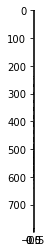

In [15]:
print ("Prediction : ", label_description[mlp.predict(X_test[100])], ", Ground Truth : ", label_description[y_test[100]])
ImageDisplay(X_test[100].reshape(-1,1))